In [1]:
import numpy as np
import math
import xarray as xr 
import pickle 
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.linear_model import LinearRegression
import scipy.stats

/knight/anaconda_jan21/envs/aug21/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load pickle files for gph
infile = open("../AnomERAVals/cap_gphanom.p", 'rb')
gp1 = pickle.load(infile)
infile.close()

## load files for SFC, 2m Temp
infile = open("../TemperatureGroupings/gl_850anom.p", 'rb')
tmp1 = pickle.load(infile)
infile.close()

infile = open("../TemperatureGroupings/cap_850anom.p", 'rb')
tmc1 = pickle.load(infile)
infile.close()

infile = open("../TemperatureGroupings/e_850anom.p", 'rb')
tme1 = pickle.load(infile)
infile.close()

infile = open("../EOFs/ehf100_latavg.p", 'rb')
ehf1 = pickle.load(infile)
infile.close()

In [3]:
## reduce temperature 
tmp1 = np.nanmean(tmp1, axis = 1)
tmp1 = np.nanmean(tmp1, axis = 1) ##avg temp anomaly over great lakes

In [4]:
tmp = tmp1.reshape((40,608))
gp = gp1.reshape((40,608))

In [5]:
ehf = ehf1.reshape((40,608))

In [6]:
infile = open("../New_EllipseVals/ephi50_79.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_ratio10_79.p", 'rb')
rat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_size10_79.p", 'rb')
size10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlat10_79.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlon10_79.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_wind10_79.p", 'rb')
wind10 = pickle.load(infile)
infile.close()

In [7]:
ephi10 = np.delete(ephi10,[480,481,482,483,605,606,607],1)
rat10 = np.delete(rat10,[480,481,482,483,605,606,607],1)
size10 = np.delete(size10,[480,481,482,483,605,606,607],1)
cenlat10 = np.delete(cenlat10,[480,481,482,483,605,606,607],1)
cenlon10 = np.delete(cenlon10,[480,481,482,483,605,606,607],1)
wind10 = np.delete(wind10,[480,481,482,483,605,606,607],1)
tp = np.delete(tmp,[480,481,482,483,605,606,607],1)
gp = np.delete(gp,[480,481,482,483,605,606,607],1)
eh = np.delete(ehf,[480,481,482,483,605,606,607],1)

In [8]:
t = tp.reshape((24040,))
g = gp.reshape((24040,))
ef = eh.reshape((24040,)) 
wind = np.reshape(wind10, (24040))
ephi = np.reshape(ephi10, (24040))
rat = np.reshape(rat10, (24040))
size = np.reshape(size10, (24040))
cenlt= np.reshape(cenlat10, (24040))
cenln= np.reshape(cenlon10, (24040))

In [9]:
##quantiles of anomalies !! 
mx = np.nanquantile(t,1,axis = 0) #maximum
q90 = np.nanquantile(t,0.9,axis = 0) #ninety
q85 = np.nanquantile(t,0.85,axis = 0)
q80 = np.nanquantile(t,0.8,axis = 0)
q75 = np.nanquantile(t,0.75,axis = 0) #seventy
q70 = np.nanquantile(t,0.7,axis = 0)
q65 = np.nanquantile(t,0.65,axis = 0)
q60 = np.nanquantile(t,0.6,axis = 0) 
q55 = np.nanquantile(t,0.55,axis = 0)
q50 = np.nanquantile(t,0.5,axis = 0) 
q45 = np.nanquantile(t,0.45,axis = 0)
q40 = np.nanquantile(t,0.4,axis = 0)
q35 = np.nanquantile(t,0.35,axis = 0)
q30 = np.nanquantile(t,0.3,axis = 0) #thirty 
q25 = np.nanquantile(t,0.25,axis = 0)
q20 = np.nanquantile(t,0.2,axis = 0)
q15 = np.nanquantile(t,0.15,axis = 0)
q10 = np.nanquantile(t,0.1,axis = 0) 
mn = np.nanquantile(t,0,axis = 0) #minimum

In [10]:
#set empty list of metrics across clusters
w_mn = []
e_mn = []
r_mn = []
s_mn = []
ct_mn = []
cn_mn = []
g_mn = []
eh_mn = []

w5 = []
e5 = []
r5 = []
s5 = []
ct5 = []
cn5 = []
g5 = []
eh5 = []

w7 = []
e7 = []
r7 = []
s7 = []
ct7 = []
cn7 = []
g7 = []
eh7 = []

w_mx = []
e_mx = []
r_mx = []
s_mx = []
ct_mx = []
cn_mx = []
g_mx = []
eh_mx = []

In [11]:
#####fix this tn, also make box plots tn

In [12]:
for i in range(len(tp[:,0])):
    for j in range(56,601,1):
        if tp[i,j] >= mn and tp[i,j] < q25:
            if tp[i,j-56:j-12].all() >= mn and tp[i,j-56:j-12].all() < q25:
                continue
            else: 
                #print(label[i,j])
                w_mn.append(wind10[i,j-56:j])
                e_mn.append(ephi10[i,j-56:j])
                s_mn.append(size10[i,j-56:j])
                r_mn.append(rat10[i,j-56:j])
                ct_mn.append(cenlat10[i,j-56:j])
                cn_mn.append(cenlon10[i,j-56:j])
                g_mn.append(gp[i,j-56:j])
                eh_mn.append(eh[i,j-56:j])
                
                
        if tp[i,j] >= q25 and tp[i,j] < q50:
            if tp[i,j-56:j-12].all() >= q25 and tp[i,j-56:j-12].all() < q50:
                continue
            else: 
                #print(label[i,j])
                w5.append(wind10[i,j-56:j])
                e5.append(ephi10[i,j-56:j])
                s5.append(size10[i,j-56:j])
                r5.append(rat10[i,j-56:j])
                ct5.append(cenlat10[i,j-56:j])
                cn5.append(cenlon10[i,j-56:j])
                g5.append(gp[i,j-56:j])
                eh5.append(eh[i,j-56:j])
                
                
        if tp[i,j] >= q50 and tp[i,j] < q75:  
            #print(label[i,j])
            w7.append(wind10[i,j-56:j])
            e7.append(ephi10[i,j-56:j])
            s7.append(size10[i,j-56:j])
            r7.append(rat10[i,j-56:j])
            ct7.append(cenlat10[i,j-56:j])
            cn7.append(cenlon10[i,j-56:j])
            g7.append(gp[i,j-56:j])
            eh7.append(eh[i,j-56:j])
    
        if tp[i,j] >= q75 and tp[i,j] <= mx:
            if tp[i,j-56:j-12].all() >= q75 and tp[i,j-56:j-12].all() < mx:
                continue
            else: 
                #print(label[i,j])
                w_mx.append(wind10[i,j-56:j])
                e_mx.append(ephi10[i,j-56:j])
                s_mx.append(size10[i,j-56:j])
                r_mx.append(rat10[i,j-56:j])
                ct_mx.append(cenlat10[i,j-56:j])
                cn_mx.append(cenlon10[i,j-56:j])
                g_mx.append(gp[i,j-56:j])
                eh_mx.append(eh[i,j-56:j])

In [13]:
wind_clus = np.empty((4,56))
ephi_clus = np.empty((4,56))
size_clus = np.empty((4,56))
rat_clus = np.empty((4,56))
cenlat_clus = np.empty((4,56))
cenlon_clus = np.empty((4,56))
gph_clus = np.empty((4,56))
ehf_clus = np.empty((4,56))

In [14]:
wind_clus[0,:] = np.nanmean(np.array(w_mn), axis = 0)
wind_clus[1,:] = np.nanmean(np.array(w5), axis = 0)
wind_clus[2,:] = np.nanmean(np.array(w7), axis = 0)
wind_clus[3,:] = np.nanmean(np.array(w_mx), axis = 0)

ephi_clus[0,:] = np.nanmean(np.array(e_mn), axis = 0)
ephi_clus[1,:] = np.nanmean(np.array(e5), axis = 0)
ephi_clus[2,:] = np.nanmean(np.array(e7), axis = 0)
ephi_clus[3,:] = np.nanmean(np.array(e_mx), axis = 0)

size_clus[0,:] = np.nanmean(np.array(s_mn), axis = 0)
size_clus[1,:] = np.nanmean(np.array(s5), axis = 0)
size_clus[2,:] = np.nanmean(np.array(s7), axis = 0)
size_clus[3,:] = np.nanmean(np.array(s_mx), axis = 0)

rat_clus[0,:] = np.nanmean(np.array(r_mn), axis = 0)
rat_clus[1,:] = np.nanmean(np.array(r5), axis = 0)
rat_clus[2,:] = np.nanmean(np.array(r7), axis = 0)
rat_clus[3,:] = np.nanmean(np.array(r_mx), axis = 0)

cenlat_clus[0,:] = np.nanmean(np.array(ct_mn), axis = 0)
cenlat_clus[1,:] = np.nanmean(np.array(ct5), axis = 0)
cenlat_clus[2,:] = np.nanmean(np.array(ct7), axis = 0)
cenlat_clus[3,:] = np.nanmean(np.array(ct_mx), axis = 0)

cenlon_clus[0,:] = np.nanmean(np.array(cn_mn), axis = 0)
cenlon_clus[1,:] = np.nanmean(np.array(cn5), axis = 0)
cenlon_clus[2,:] = np.nanmean(np.array(cn7), axis = 0)
cenlon_clus[3,:] = np.nanmean(np.array(cn_mx), axis = 0)

gph_clus[0,:] = np.nanmean(np.array(g_mn), axis = 0)
gph_clus[1,:] = np.nanmean(np.array(g5), axis = 0)
gph_clus[2,:] = np.nanmean(np.array(g7), axis = 0)
gph_clus[3,:] = np.nanmean(np.array(g_mx), axis = 0)

ehf_clus[0,:] = np.nanmean(np.array(eh_mn), axis = 0)
ehf_clus[1,:] = np.nanmean(np.array(eh5), axis = 0)
ehf_clus[2,:] = np.nanmean(np.array(eh7), axis = 0)
ehf_clus[3,:] = np.nanmean(np.array(eh_mx), axis = 0)

In [15]:
#forecast_days = [i for i in range(-14,0,1)]
forecast_days = [i for i in range(-56,0,1)]

In [20]:
colors = ['royalblue','turquoise','goldenrod','darkorange']
quant = ['0-25', '25-50','50-75', '75-100']

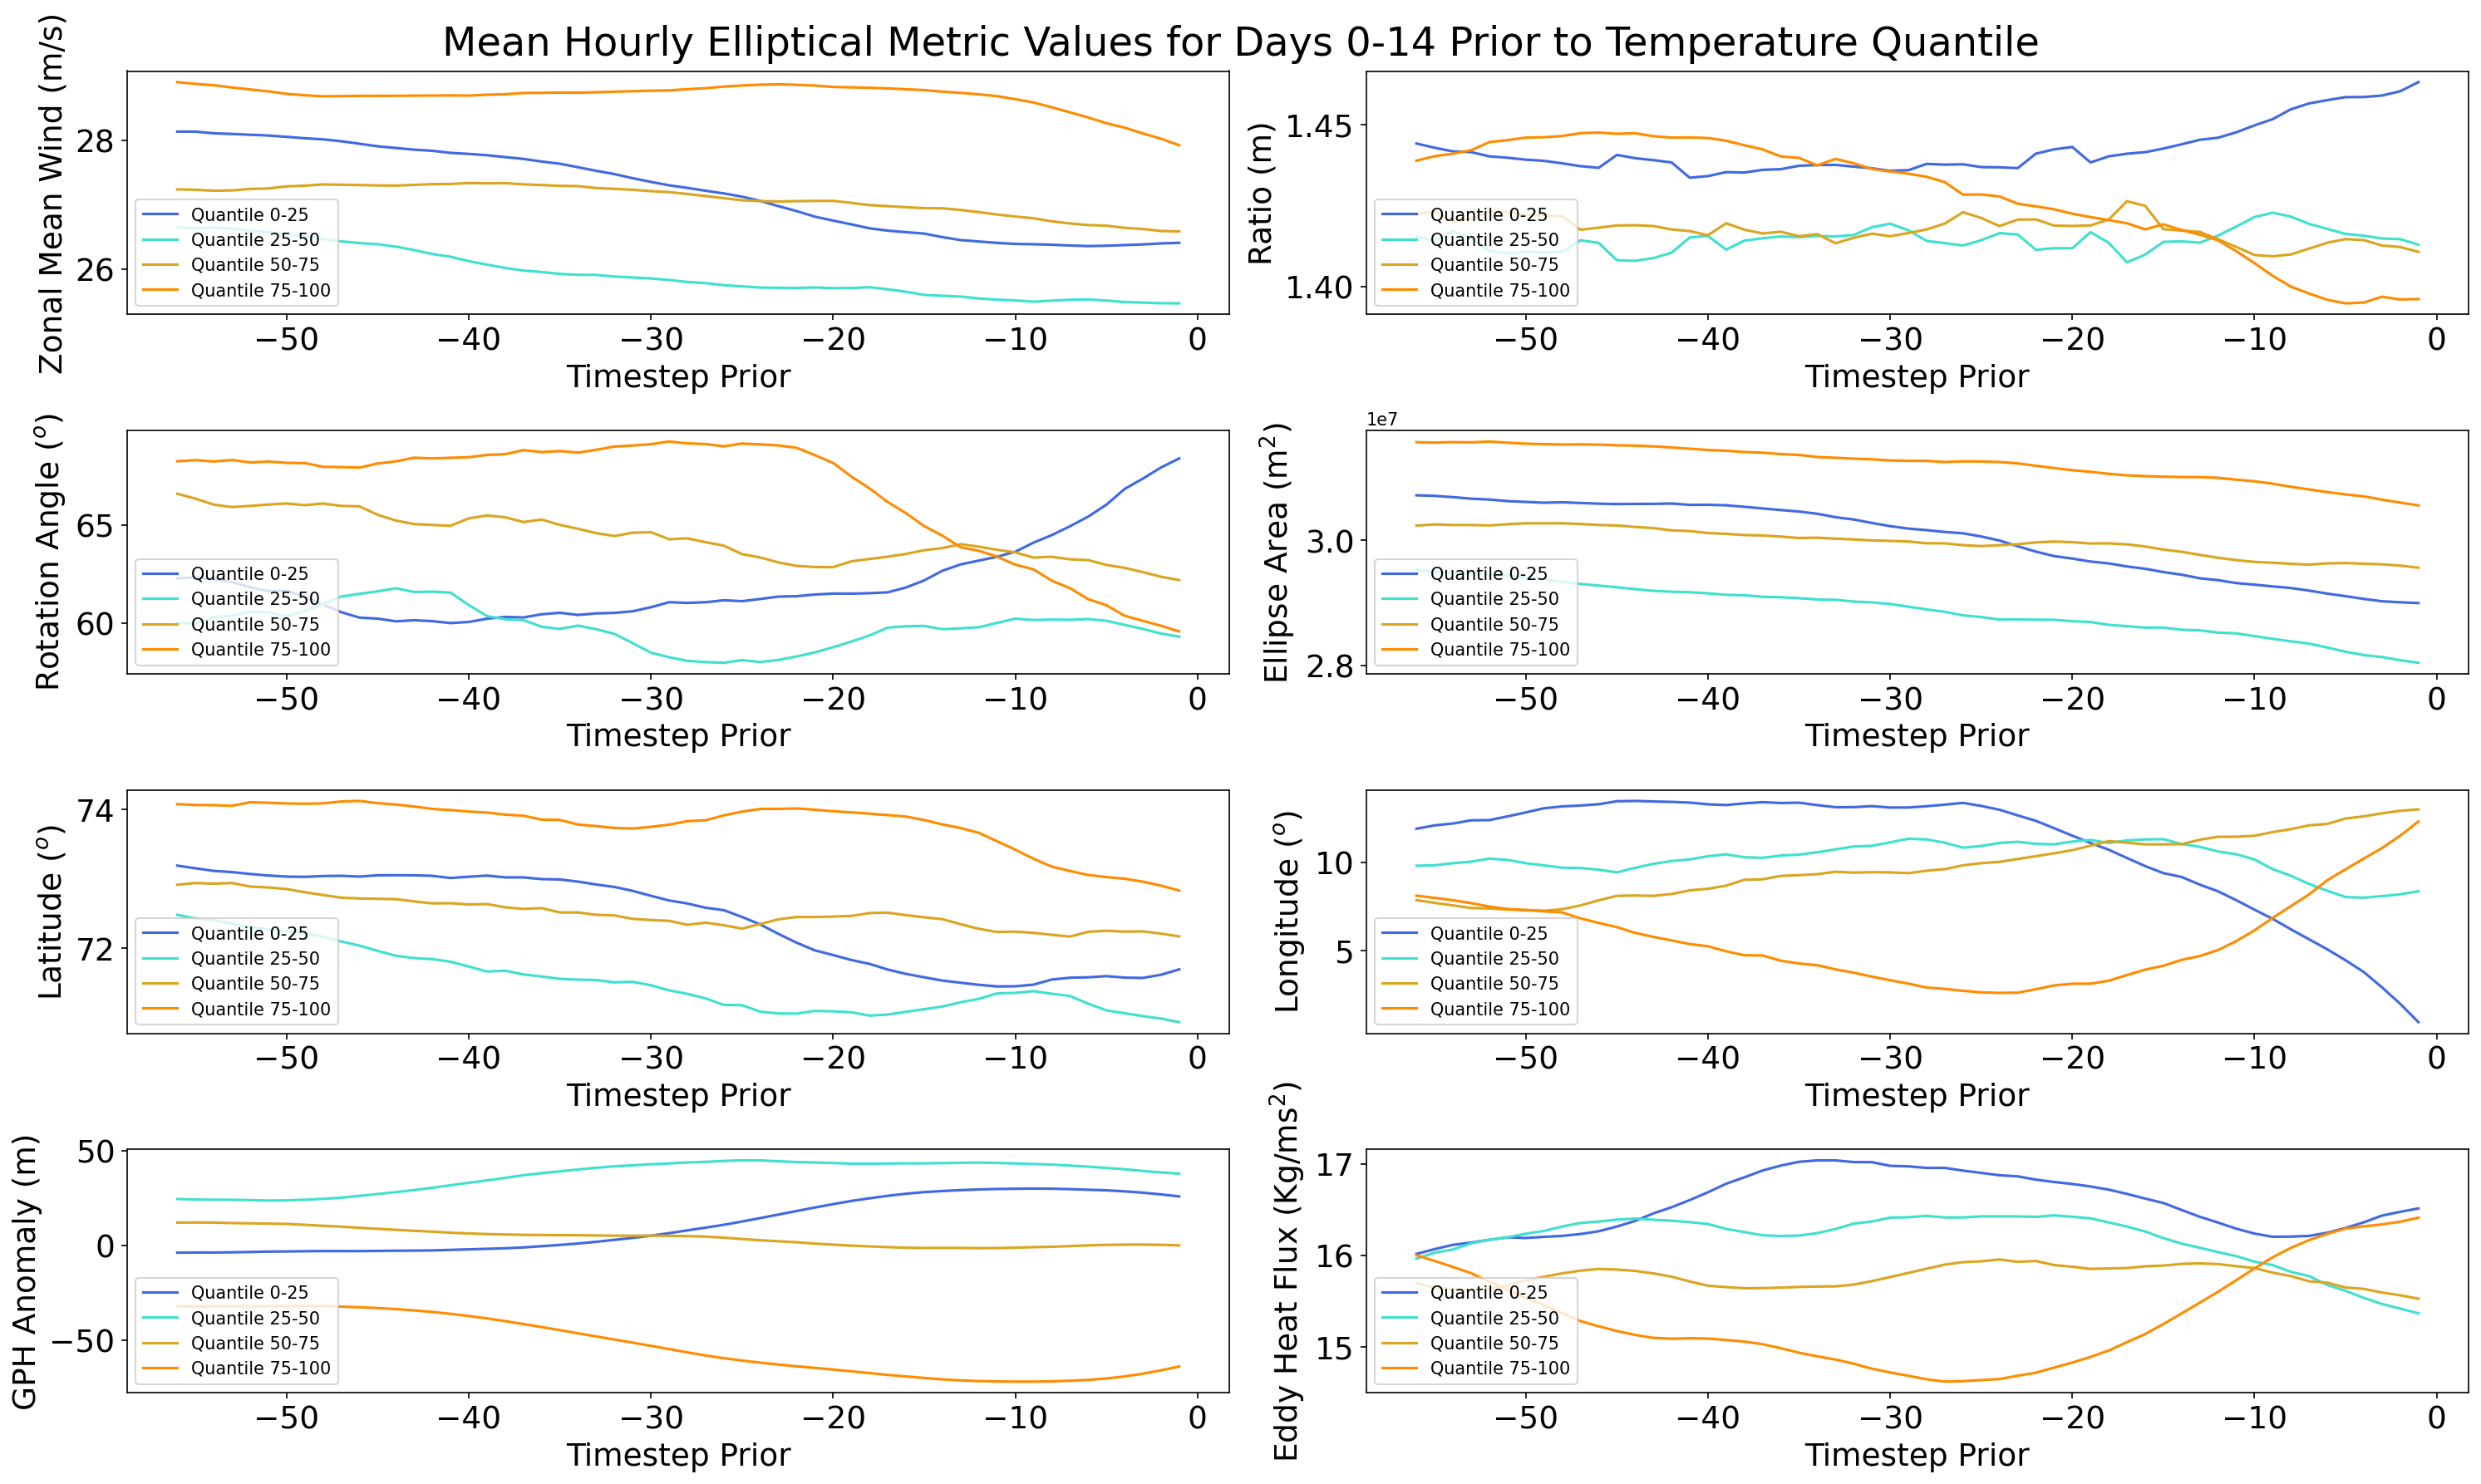

In [25]:
%matplotlib inline
##big plots
myLocator = mticker.MultipleLocator(4)

fig = plt.figure(figsize=(20,12),dpi=150)
fig.suptitle("Mean Hourly Elliptical Metric Values for Days 0-14 Prior to Temperature Quantile",fontsize = 23) 

#loop through each member
ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)
ax5 = plt.subplot(4,2,5)
ax6 = plt.subplot(4,2,6)
ax7 = plt.subplot(4,2,7)
ax8 = plt.subplot(4,2,8)

for m in range(0,4,1):
    #print(u_data_mem)
    # Specify how our lines should look
    #colorR = (m+2)/ 15.
    ax1.plot(forecast_days, wind_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax1.set_xlabel('Timestep Prior',fontsize = 18)
    ax1.set_ylabel('Zonal Mean Wind (m/s)',fontsize = 18)
    ax1.tick_params(axis='both', which='major', labelsize= 18)
    ax1.legend(loc='lower left',fontsize='medium');
    
    ax2.plot(forecast_days, rat_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax2.set_xlabel('Timestep Prior', fontsize = 18)
    ax2.set_ylabel('Ratio (m)', fontsize =18)
    ax2.tick_params(axis='both', which='major', labelsize= 18)
    ax2.legend(loc='lower left',fontsize='medium');
    
    ax3.plot(forecast_days, ephi_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax3.set_xlabel('Timestep Prior', fontsize = 18)
    ax3.set_ylabel('Rotation Angle ($^o$)', fontsize = 18)
    ax3.tick_params(axis='both', which='major', labelsize= 18)
    ax3.legend(loc='lower left',fontsize='medium');
    
    ax4.plot(forecast_days, size_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax4.set_xlabel('Timestep Prior', fontsize = 18)
    ax4.set_ylabel('Ellipse Area (m$^2$)', fontsize = 18)
    ax4.tick_params(axis='both', which='major', labelsize= 18)
    ax4.legend(loc='lower left',fontsize='medium');
    
    ax5.plot(forecast_days, cenlat_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax5.set_xlabel('Timestep Prior', fontsize = 18)
    ax5.set_ylabel('Latitude ($^o$)', fontsize = 18)
    ax5.tick_params(axis='both', which='major', labelsize= 18)
    ax5.legend(loc='lower left',fontsize='medium');
    
    ax6.plot(forecast_days, cenlon_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax6.set_xlabel('Timestep Prior', fontsize = 18)
    ax6.set_ylabel('Longitude ($^o$)', fontsize = 18)
    ax6.tick_params(axis='both', which='major', labelsize= 18)
    ax6.legend(loc='lower left',fontsize='medium');
    
    ax7.plot(forecast_days, gph_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax7.set_xlabel('Timestep Prior', fontsize = 18)
    ax7.set_ylabel('GPH Anomaly (m)', fontsize = 18)
    ax7.tick_params(axis='both', which='major', labelsize= 18)
    ax7.legend(loc='lower left',fontsize='medium');
    
    ax8.plot(forecast_days, ehf_clus[m,:], color=colors[m], label='Quantile '+quant[m])
    ax8.set_xlabel('Timestep Prior', fontsize = 18)
    ax8.set_ylabel('Eddy Heat Flux (Kg/ms$^2$)', fontsize =18)
    ax8.tick_params(axis='both', which='major', labelsize= 18)
    ax8.legend(loc='lower left',fontsize='medium');

plt.tight_layout()
plt.show()
fig.savefig("ABBRVMean_DaysToQuant.png")


In [ ]:
################## FOR BOX PLOTS ##################

In [ ]:
cenlt10 = np.nan_to_num(cenlat10, nan = -999)
cenln10 = np.nan_to_num(cenlon10, nan = -999)
rat10 = np.nan_to_num(rat10, nan = -999)
size10 = np.nan_to_num(size10, nan = -999)
ephi10 = np.nan_to_num(ephi10, nan = -999)
wind10 = np.nan_to_num(wind10, nan = -999)

In [ ]:
#set empty list of metrics across clusters
w1 = []
e1 = []
r1 = []
s1 = []
ct1 = []
cn1 = []

w2 = []
e2 = []
r2 = []
s2 = []
ct2 = []
cn2 = []

w3 = []
e3 = []
r3 = []
s3 = []
ct3 = []
cn3 = []

w4 = []
e4 = []
r4 = []
s4 = []
ct4 = []
cn4 = []

w5 = []
e5 = []
r5 = []
s5 = []
ct5 = []
cn5 = []

w6 = []
e6 = []
r6 = []
s6 = []
ct6 = []
cn6 = []

w7 = []
e7 = []
r7 = []
s7 = []
ct7 = []
cn7 = []

In [ ]:
for i in range(len(tp)):
    for j in range(56,601,1):
        if tp[i,j] >= mn and tp[i,j] < q25:
            if tp[i,j-56:j-12].all() >= mn and tp[i,j-56:j-12].all() < q10:
                continue
            else: 
                #print(label[i,j])
                w1.append(wind10[i,j-56])
                e1.append(ephi10[i,j-56])
                s1.append(size10[i,j-56])
                r1.append(rat10[i,j-56])
                ct1.append(cenlat10[i,j-56])
                cn1.append(cenlon10[i,j-56])
                
        if tp[i,j] >= q25 and tp[i,j] < q50:
            if tp[i,j-56:j-12].all() >= q10 and tp[i,j-56:j-12].all() < q25:
                continue
            else: 
                #print(label[i,j])
                w2.append(wind10[i,j-56])
                e2.append(ephi10[i,j-56])
                s2.append(size10[i,j-56])
                r2.append(rat10[i,j-56])
                ct2.append(cenlat10[i,j-56])
                cn2.append(cenlon10[i,j-56])
                
            
        if tp[i,j] >= q50 and tp[i,j] < q75:
            #print(label[i,j])
            w4.append(wind10[i,j-56])
            e4.append(ephi10[i,j-56])
            s4.append(size10[i,j-56])
            r4.append(rat10[i,j-56])
            ct4.append(cenlat10[i,j-56])
            cn4.append(cenlon10[i,j-56])
                
    
        if tp[i,j] >= q75 and tp[i,j] <= mx:
            if tp[i,j-56:j-12].all() >= q75 and tp[i,j-56:j-12].all() < mx:
                continue
            else: 
                #print(label[i,j])
                w7.append(wind10[i,j-56])
                e7.append(ephi10[i,j-56])
                s7.append(size10[i,j-56])
                r7.append(rat10[i,j-56])
                ct7.append(cenlat10[i,j-56])
                cn7.append(cenlon10[i,j-56])

In [ ]:
#filter out to ignore NaNs.
##Wind
w1 = [i for i in w1 if i > -50]
w2 = [i for i in w2 if i > -50]
w4 = [i for i in w4 if i > -50]
w7 = [i for i in w7 if i > -50]

##Ephi
e1 = [i for i in e1 if i > -200]
e2 = [i for i in e2 if i > -200]
e4 = [i for i in e4 if i > -200]
e7 = [i for i in e7 if i > -200]

##Size
s1 = [i for i in s1 if i > -50]
s2 = [i for i in s2 if i > -50]
s4 = [i for i in s4 if i > -50]
s7 = [i for i in s7 if i > -50]

##Ratio
r1 = [i for i in r1 if i > -50]
r2 = [i for i in r2 if i > -50]
r4 = [i for i in r4 if i > -50]
r7 = [i for i in r7 if i > -50]

##Center Latitude
ct1 = [i for i in ct1 if i > -50]
ct2 = [i for i in ct2 if i > -50]
ct4 = [i for i in ct4 if i > -50]
ct7 = [i for i in ct7 if i > -50]

##Center Longitude
cn1 = [i for i in cn1 if i > -360]
cn2 = [i for i in cn2 if i > -360]
cn4 = [i for i in cn4 if i > -360]
cn7 = [i for i in cn7 if i > -360]

In [ ]:
#lists of combined cluster data from different metrics

wind_clus = [w1,w2,w4,w7]
ephi_clus = [e1,e2,e4,e7]
rat_clus = [r1,r2,r4,r7]
size_clus = [s1,s2,s4,s7]
cenlat_clus = [ct1,ct2,ct4,ct7]
cenlon_clus = [cn1,cn2,cn4,cn7]

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(18,12),dpi=150)
fig.suptitle("Ranges of Elliptical Metrics 14th Day Prior to Temperature Quantile",fontsize = 20)
#loop through each member
ax1 = plt.subplot(2,3,1)
ax1.boxplot(wind_clus)
ax1.set_xlabel("Quantile",fontsize = 16)
ax1.set_ylabel("Zonal Mean Wind (m/s)",fontsize = 16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = plt.subplot(2,3,2)
ax2.boxplot(ephi_clus)
ax2.set_xlabel("Quantile",fontsize = 16)
ax2.set_ylabel("Rotation Angle ($^o$)",fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3 = plt.subplot(2,3,3)
ax3.boxplot(rat_clus)
ax3.set_xlabel("Quantile",fontsize = 16)
ax3.set_ylabel("Ratio (m)",fontsize = 16)
ax3.tick_params(axis='both', which='major', labelsize=14)

ax4 = plt.subplot(2,3,4)
ax4.boxplot(size_clus)
ax4.set_xlabel("Quantile",fontsize = 16)
ax4.set_ylabel("Elliptical Area (m$^2$)",fontsize = 16)
ax4.tick_params(axis='both', which='major', labelsize=14)

ax5 = plt.subplot(2,3,5)
ax5.boxplot(cenlat_clus)
ax5.set_xlabel("Quantile",fontsize = 16)
ax5.set_ylabel("Latitude ($^o$)",fontsize = 16)
ax5.tick_params(axis='both', which='major', labelsize=14)

ax6 = plt.subplot(2,3,6)
ax6.boxplot(cenlon_clus)
ax6.set_xlabel("Quantile",fontsize = 16)
ax6.set_ylabel("Longitude ($^o$)",fontsize = 16)
ax6.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
#fig.savefig("AnomalyClus_Met_BoxPlot.png")


#### Let us create the chicklet plot for temp quantiles, lol

In [ ]:
label = []

for i in range(len(t)):
    if t[i] >= mn and t[i] < q10:
        label.append(1)
        
    #if t[i] >= q25 and t[i] < q50:
        #label.append(2)
        
    if t[i] >= q30 and t[i] < q70:
        label.append(2)
        
    if t[i] >= q70 and t[i] <= mx:
        label.append(3)
    

label = np.reshape(label,(40,601))

In [ ]:
label

In [ ]:
gph_array = gph["time"].to_numpy()
cluster_dates = gph_array.reshape(40,608)
quant_dates = np.delete(cluster_dates,[480,481,482,483,605,606,607],1)

In [ ]:
import datetime as dt
import pandas as pd
days = []
years = []

for i in range(len(quant_dates[0,:])):
    test = quant_dates[0,i]
    t =  pd.to_datetime(str(test)) 
    test = t.strftime("%m-%d")
    days.append(test)

for i in range(len(quant_dates[:,0])):
    test = quant_dates[i,0]
    t =  pd.to_datetime(str(test)) 
    test = t.strftime("%Y")
    years.append(test)

In [ ]:
quant_dates = xr.DataArray(data= label, 
                       dims = ["year","day"],
                       coords = dict(
                           year = years,
                           day = days)
                      )
quant_dates

In [ ]:
pickle.dump(label, open("30ABBRVquant_labels.p", 'wb'))

In [ ]:
%matplotlib inline
myLocator = mticker.MultipleLocator(8)
fig, ax = plt.subplots(1, 1, figsize=(15, 15)) 
# define the bins and normalize
plt.title("Temperature Quantiles for 850hPa Anomalies over GL Region, 1979-2019",fontsize=18)
cmap = matplotlib.cm.jet
norm = matplotlib.colors.Normalize(vmin = np.min(quant_dates.values),
                                   vmax=np.max(quant_dates.values))

cax = ax.pcolormesh(quant_dates['day'].values,
              quant_dates['year'].values, 
              quant_dates.values,cmap=cmap, norm=norm)

ax.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=60,fontsize = 14)
plt.xlabel("Day of Year",fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Year",fontsize = 15)

cbar = fig.colorbar(cax, ticks=[3,2,1])
cbar.ax.set_yticklabels(['70-100', '30-70','0-30']) 
cbar.set_label(label='Quantile', size=14)

cbar.update_ticks()

plt.savefig("30ABBRVTempAnomQuantbyDay.png")
